### Module 2 In Class Project

1. Use your RGB to HSV function inside the nested pixel loop.
2. Apply your image pipeline.

Extra Credit
1. BGR to RGB function within the nested pixel loop


### Image Pipeline
<ol>
<li> Take a picture of your face</li>
<li> Import the image into Jupyter Notebook</li>
<li> Analyze the image</li>
<li> Create a histogram of the whole image (RGB)</li>
<li> Modify your image with brightness and contrast</li>
<li> Mask out your face</li>
<li> Use the mask to create a HSV histogram</li>
<li> Analyze the histogram for skintone ranges</li>
<li> Use the HSV ranges to create a mask</li>
<li> Apply the mask to the image and segment out your skin/face</li>
</ol>


In [113]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def create_rect(img, view=False):
    global top_left, bottom_right
    # Top left
    top_left = (35, 95)
    # Bottom right
    bottom_right = (140, 160)
    # Color
    rect_color = (255, 0, 0)
    # Thickness
    thickness = 1
    # Apply rectangle
    img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
    
    if view:
        img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)
        fig = plt.figure(figsize=(10,10))
        plt.imshow(img_rect)
        
        img_rect = cv2.cvtColor(img_rect, cv2.COLOR_RGB2BGR)
    
    return img_rect

In [115]:
def create_mask(img, view=False):
    global top_left, bottom_right
    # Create a mask
    # Create a black mask
    mask = np.zeros(img.shape[:2], np.uint8)
    
    # Add the white portion of the mask
    mask[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 255
    
    if view:
        plt.imshow(mask, cmap='gray')
    
    return mask

In [116]:
def create_histogram(img, mask):
    img = bgr_to_hsv(img)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # print(img.shape, img2.shape)
    
    fig = plt.figure(figsize=(5,5))
    
    # Plot the hue
    hist = cv2.calcHist([img], [0], mask, [256], [0,255])
    plt.plot(hist, color='red')
    plt.xlim([0,255])
    
    # Plot the saturation
    hist = cv2.calcHist([img], [1], mask, [256], [0,255])
    plt.plot(hist, color='green')
    plt.xlim([0,255])
    
    # Plot the value
    hist = cv2.calcHist([img], [2], mask, [256], [0,255])
    plt.plot(hist, color='blue')
    plt.xlim([0,255])
    
    # Legend
    plt.legend(('Hue', 'Saturation', 'Value'), loc='upper right')
    plt.show()
    # img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    return img

In [117]:
def rgb_to_hsv_single(rgb):
    # Input: rgb is a 1-D array with values in range [0..255]
    # r = rgb[0], g = rgb[1], b = rgb[2]
    # Output: hsv is a 1-D array with values in range h = [0..255], s = [0..1], v = [0..1]
    
    # Normalize input
    rgb = rgb/255
    
    h = 0.0
    s = 0.0
    v = 0.0
    
    # Find the max and min RGB values
    v = np.max(rgb)
    vMin = np.min(rgb)
    
    diff = v-vMin
    
    if v == 0:
        s = 0
    else:
        s = diff/v
        
        
    if rgb[0] == rgb[1] and rgb[1] == rgb[2]:
        h = 0
    elif v == rgb[0]:
        h = 60*(rgb[1]-rgb[2])/diff
    elif v == rgb[1]:
        h = 120+60*(rgb[2]-rgb[0])/diff
    elif v == rgb[2]:
        h = 240+60*(rgb[0]-rgb[1])/diff
        
    return np.array([round(h/2),round(np.interp(s,[0,1],[0,255])),round(np.interp(v,[0,1],[0,255]))])


def bgr_to_hsv(bgr):
    # Input: bgr is a 3-D array with values in range [0..255]
    # 2 Dimensions are for pixel coordinates
    # 1 Dimension is for the RGB values
    # The deepest layer is the RGB information
    
    # print(bgr)
    
    hsv = np.zeros((bgr.shape[0], bgr.shape[1], bgr.shape[2]), np.uint8)
    
    # print(bgr.shape, hsv.shape)
    
    # print(hsv)
    # Iterate over 2D array of coordinates
    for row_index, row in enumerate(bgr):
        # print(hsv)
        for col_index, col in enumerate(row):
            # print(col, [col[2], col[1], col[0]])
            new_value = rgb_to_hsv_single(np.array([col[2], col[1], col[0]]))
            # print(new_value)
            hsv[row_index,col_index] = new_value

    
    return hsv

In [118]:
def filter_skin(img, view=False):
    # Create min and max HSV values for mask
    min_HSV = np.array([0,20,50], np.uint8)
    max_HSV = np.array([30,150,255], np.uint8)
    
    # cv2.inRange(image, min, max)
    skin_area = cv2.inRange(img, min_HSV, max_HSV)
    
    # Bitwise AND mask
    skin_HSV = cv2.bitwise_and(img, img, mask=skin_area)
    
    if view:
        skin_HSV = cv2.cvtColor(skin_HSV, cv2.COLOR_HSV2RGB)
        plt.imshow(skin_HSV)
        skin_HSV = cv2.cvtColor(skin_HSV, cv2.COLOR_RGB2HSV)

In [119]:
def pipeline(img_file):
    # Import image
    img = cv2.imread(img_file, 1)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    
    img_rect = create_rect(img, True)
    mask = create_mask(img_rect, True)
    img = cv2.imread(img_file, 1)
    img = create_histogram(img, mask)
    filter_skin(img, True)

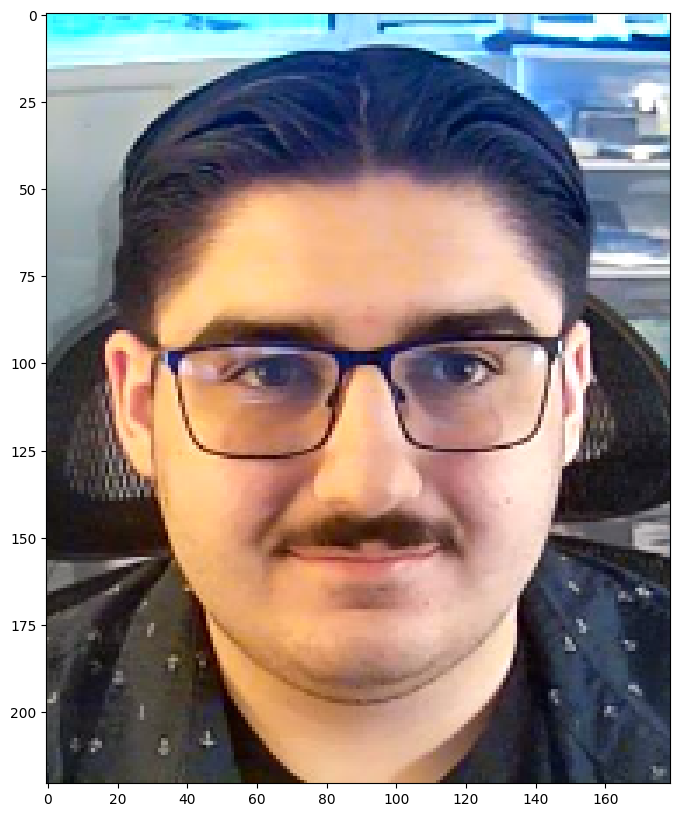

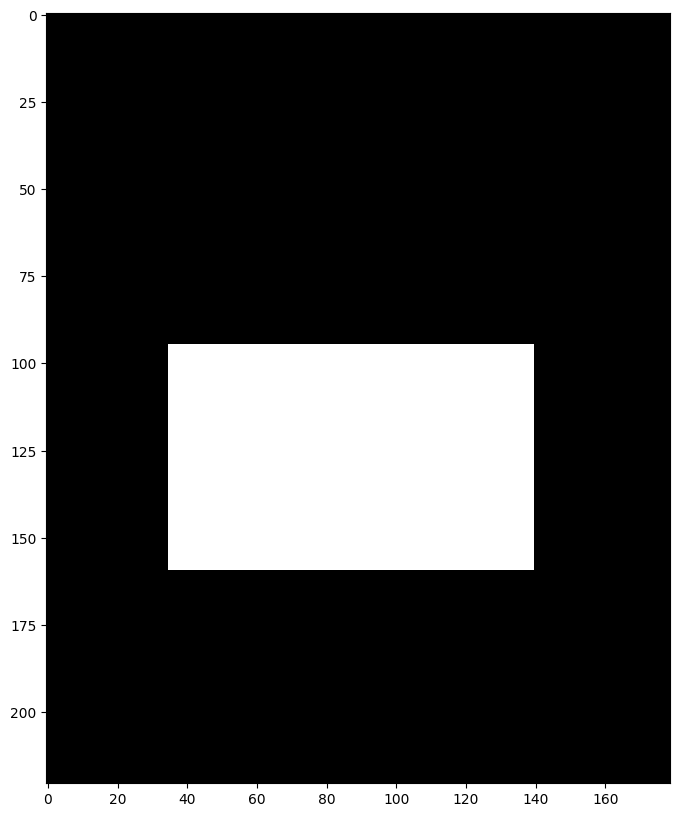

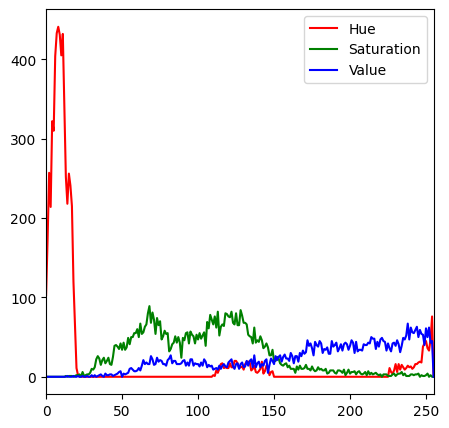

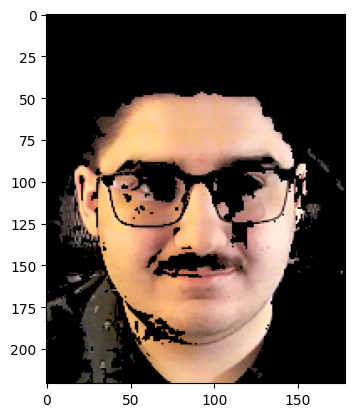

In [120]:
pipeline('../Graphics/face.png')